<a href="https://colab.research.google.com/github/tcaba2/Comp-Astro2024/blob/main/Tutorial%204/Tutorial_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [7]:
# Load the data
df = pd.read_csv('PS_2024.04.18_07.08.38.csv', sep=',', comment='#')

In [9]:
# Keep only necessary columns and drop rows with missing values
df = df[['pl_orbsmax', 'pl_bmassj', 'discoverymethod']].dropna()

In [13]:
# creating two classes
# radial velocity method is 1. imaging methods are 0

df['discovery_flag'] = np.where((df['discoverymethod'] == 'Radial Velocity'), '1', '0')

In [14]:
# Encode the target variable
label_encoder = LabelEncoder()
df['discoverymethod'] = label_encoder.fit_transform(df['discoverymethod'])

# Split data into features and target
X = df.drop('discoverymethod', axis=1).values
y = df['discoverymethod'].values

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [16]:
# Define the model
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))  # Hidden layer with 8 neurons
model.add(Dense(4, activation='relu'))  # Hidden layer with 4 neurons
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 11)                55        
                                                                 
Total params: 123 (492.00 Byte)
Trainable params: 123 (492.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
316/316 [==============================] - 2s 3ms/step - loss: 1.9000 - accuracy: 0.4259 - val_loss: 1.1849 - val_accuracy: 0.4291
Epoch 2/50
316/316 [==============================] - 1s 4ms/step - loss: 0.7950 - accuracy: 0.7557 - val_loss: 0.5748 - val_accuracy: 0.8367
Epoch 3/50
316/316 [==============================] - 1s 4ms/step - loss: 0.4954 - accuracy: 0.8415 - val_loss: 0.4623 - val_accuracy: 0.8430
Epoch 4/50
316/316 [==============================] - 2s 5ms/step - loss: 0.4334 - accuracy: 0.8494 - val_loss: 0.4349 - val_accuracy: 0.8557
Epoch 5/50
316/316 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8544 - val_loss: 0.4220 - val_accuracy: 0.8570
Epoch 6/50
316/316 [==============================] - 1s 4ms/step - loss: 0.3979 - accuracy: 0.8566 - val_loss: 0.4103 - val_accuracy: 0.8595
Epoch 7/50
316/316 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8595 - val_loss: 0.4046 - val_accuracy: 0.8658
Epoch 

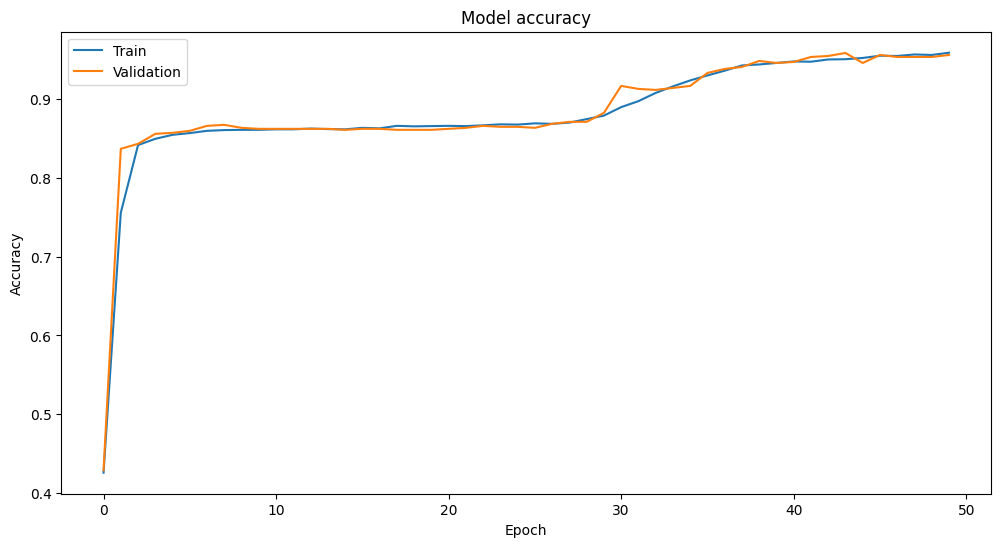

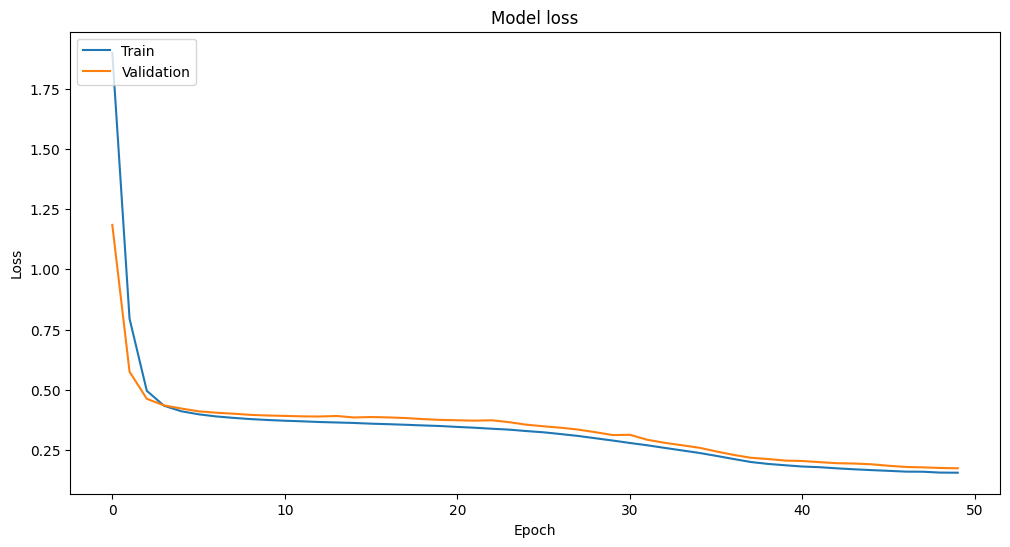

In [22]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()